In [1]:
import pandas as pd
import csv
import os, os.path
from sklearn.preprocessing import LabelEncoder
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm  
from sklearn.linear_model import LogisticRegression 
from sklearn.cluster import KMeans
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# from sklearn import preprocessing
# import matplotlib.pyplot as plt 
# import seaborn as sns
# from numpy import array


In [52]:
#creating my dataframe
mydata=pd.DataFrame({"Db": [], "Hz": []})
labels=pd.DataFrame({"Male": [], "Feeling": [], "Person":[]})

In [53]:
students=['\\mario','\\giuliano','\\cristina'] #directory of records of each student
for i in students:
    
    cwd = os.getcwd() #current working directory
    sd = cwd + str(i) #student directory
    lab = pd.read_csv(str(sd)+'\\labels.csv', sep=';') #read the labels file
    labels=pd.concat([labels,lab], ignore_index=True)
    
    for k in range(1,len(os.listdir(sd))): #runs the cycle with respect to number of records for each student
        
        read = pd.read_csv(str(sd)+'\\sl Registrazione '+str(k)+'.csv', sep = ',') #read data  
        
        Db=read["DecibelSource"].dropna()  #clean from NAs
        Hz=read["PitchSensor"].dropna()    
        
        Db=list(Db)#make them to list to easier work later
        Hz=list(Hz)
        
        mydata=mydata.append({'Db' : Db , 'Hz' : Hz} , ignore_index=True)

    
result=pd.concat([mydata,labels], axis=1) #merge labels and data

In [4]:
result.head()

,Db,Hz,Feeling,ID Registration,Male,Person
0,"[51.509708077318315, 49.206463639207875, 53.09...","[83.5404052734375, 83.5404052734375, 83.540405...",angry,sl Registrazione 1,1.0,other
1,"[55.10859961906438, 51.864688959738814, 51.652...","[291.0975477430556, 331.6312255859375, 331.631...",happy,sl Registrazione 2,0.0,other
2,"[29.52738094783193, 27.660100580824576, 25.288...","[268.5400390625, 230.9423828125, 230.942382812...",serious,sl Registrazione 3,1.0,other
3,"[33.119446531464924, 28.733594908973828, 33.64...","[419.1162109375, 419.1162109375, 419.116210937...",sad,sl Registrazione 4,1.0,other
4,"[19.45318383545405, 18.038502361992837, 16.372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 339.233398...",angry,sl Registrazione 5,0.0,other


# Cleaning

In [54]:
#see if there are problem with classes
print(set(result.Person))
print(set(result.Feeling))

{'mario', 'other ', 'cristina', 'giuliano', 'other'}
{'angry', 'happy ', 'sad', 'sad ', 'steady', 'serious', 'happy'}


In [55]:
#fix them
for i in range(len(result)):
    if result['Feeling'][i]=='happy ':
        result['Feeling'][i]='happy'
    if result['Feeling'][i]=='serious':
        result['Feeling'][i]='steady'
    if result['Person'][i]=='other ':
        result['Person'][i]='other'
    if result['Feeling'][i]=='sad ':
        result['Feeling'][i]='sad'

C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A 

#### Categorical encoding

In [56]:
##transform every cathegorical var into numbers
le=LabelEncoder()

cat=['Feeling','Person']

for i in cat:
    result[i]=le.fit_transform(result[i].astype(str))

In [57]:
result.head()

,Db,Hz,Feeling,ID Registration,Male,Person
0,"[51.509708077318315, 49.206463639207875, 53.09...","[83.5404052734375, 83.5404052734375, 83.540405...",0,sl Registrazione 1,1.0,3
1,"[55.10859961906438, 51.864688959738814, 51.652...","[291.0975477430556, 331.6312255859375, 331.631...",1,sl Registrazione 2,0.0,3
2,"[29.52738094783193, 27.660100580824576, 25.288...","[268.5400390625, 230.9423828125, 230.942382812...",3,sl Registrazione 3,1.0,3
3,"[33.119446531464924, 28.733594908973828, 33.64...","[419.1162109375, 419.1162109375, 419.116210937...",2,sl Registrazione 4,1.0,3
4,"[19.45318383545405, 18.038502361992837, 16.372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 339.233398...",0,sl Registrazione 5,0.0,3


In [58]:
#are the feeling balanced?
print(str(len(result.loc[result["Feeling"]==0]))+' angry records')
print(str(len(result.loc[result["Feeling"]==1]))+' happy records')
print(str(len(result.loc[result["Feeling"]==2]))+' sad records')
print(str(len(result.loc[result["Feeling"]==3]))+' steady records')
print('')
print(str(len(result.loc[result["Male"]==0]))+' female records')
print(str(len(result.loc[result["Male"]==1]))+' male records')

107 angry records
99 happy records
100 sad records
97 steady records

197 female records
206 male records


In [59]:
#evaluate mininum len
mini=100000000000000000 
for i in range(len(result)):
    now=len(result["Hz"][i]) #see lenght of first HZ vector
#     print(str(i)+ " " +str(now)) #print number of vector and his lenght
    if now<mini: #see if is the shortest vector
        mini=now #if shortest, update minimum value
# mini

In [11]:
##SOLO UNA PROVA!!! PROVARE AD USARE FRAMMENTI DI REGISTRAZIONE MOLTO PIU PICCOLI
# mini=20

In [60]:
#same len for all

for i in range(len(result)):
    result["Db"][i]=result["Db"][i][0:mini]

for i in range(len(result)):
    result["Hz"][i]=result["Hz"][i][0:mini]

C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [61]:
#selecting only male and female to study their properties
male=result.loc[result["Male"]==1]
male=male.reset_index(drop=True)  #setting new indexes for the new DF
female=result.loc[result["Male"]==0]
female=female.reset_index(drop=True)

In [62]:
##let's see how the means differs
somma=0
for i in range(len(male)):
    somma+=mean(male["Db"][i])
print("mean for DB in male is "+str(round(somma/(len(male)+1),2)))

somma=0
for i in range(len(male)):
    somma+=mean(male["Hz"][i])
print("mean for HZ in male is " + str(round(somma/(len(male)+1),2)))

##now for female..
somma=0
for i in range(len(female)):
    somma+=mean(female["Db"][i])
print("mean for DB in female is "+str(round(somma/(len(female)+1),2)))

somma=0
for i in range(len(female)):
    somma+=mean(female["Hz"][i])
print("mean for HZ in female is " +str(round(somma/(len(female)+1),2)))

mean for DB in male is 44.61
mean for HZ in male is 267.94
mean for DB in female is 43.14
mean for HZ in female is 300.29


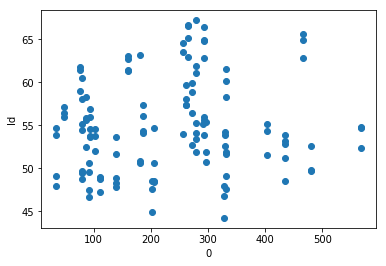

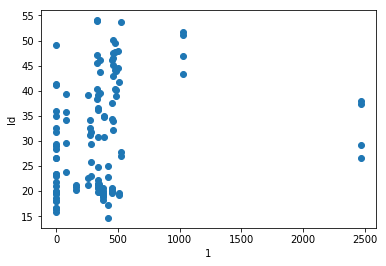

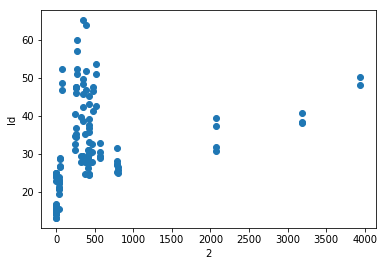

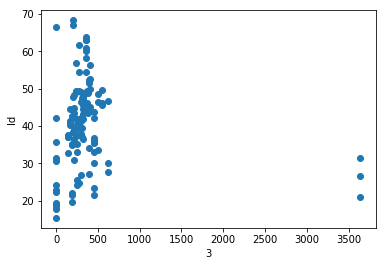

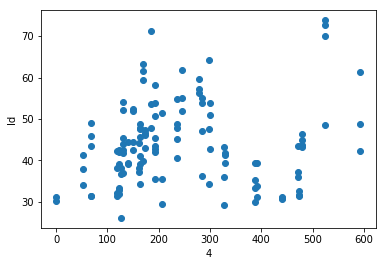

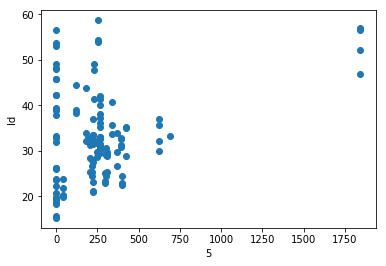

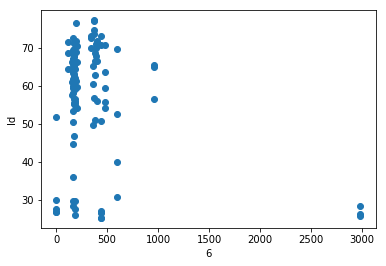

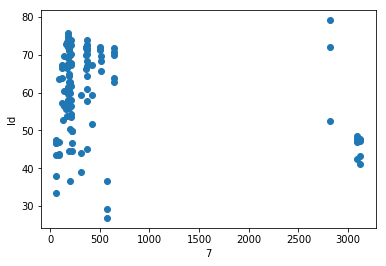

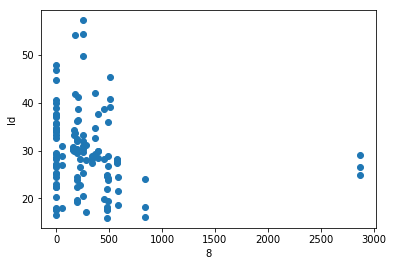

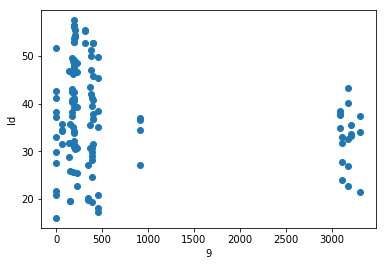

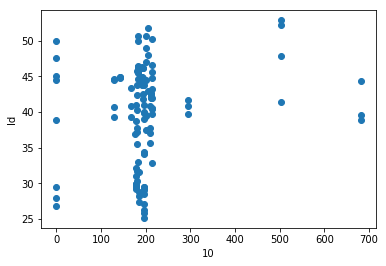

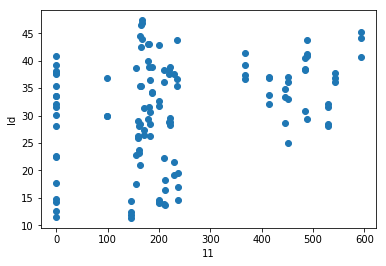

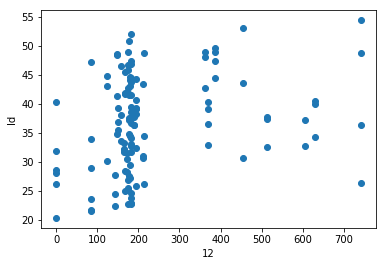

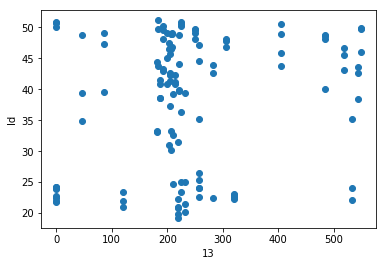

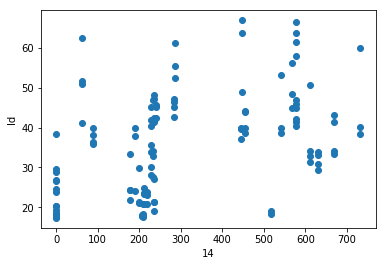

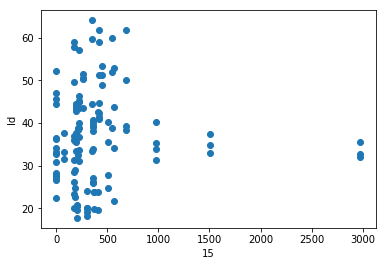

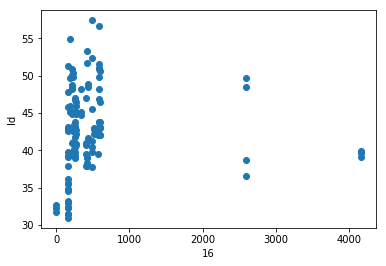

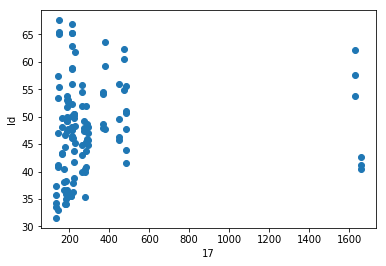

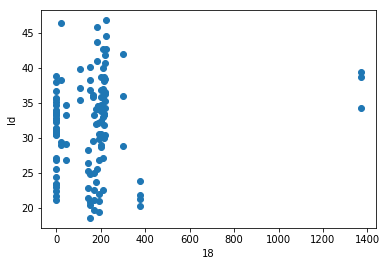

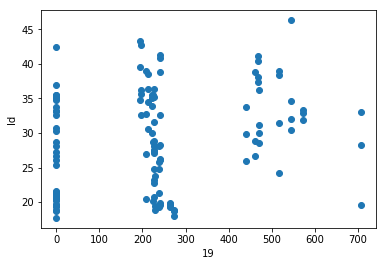

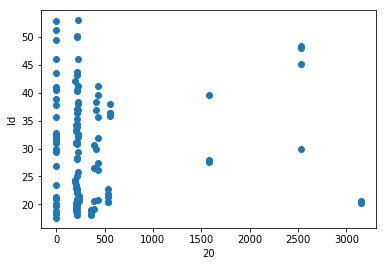

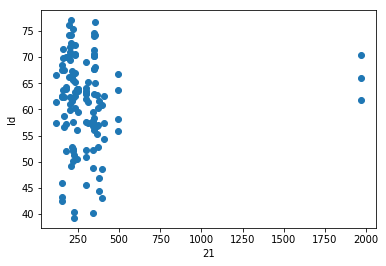

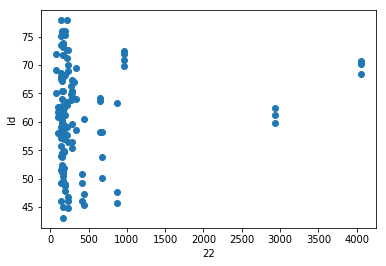

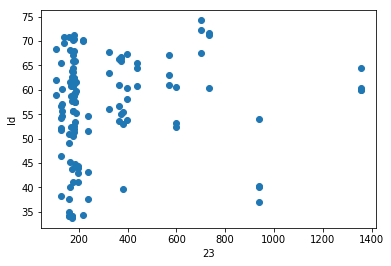

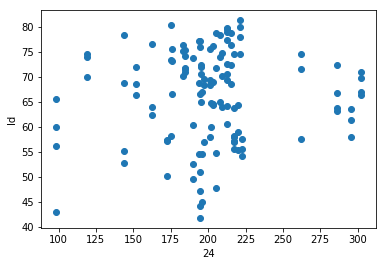

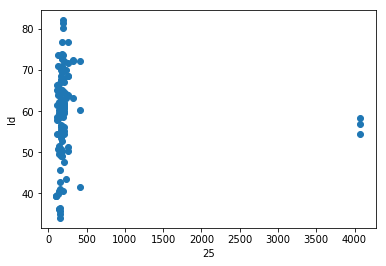

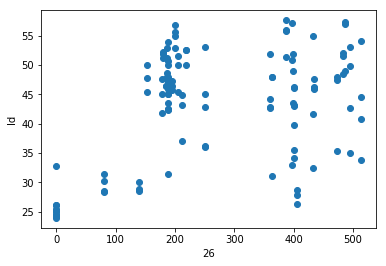

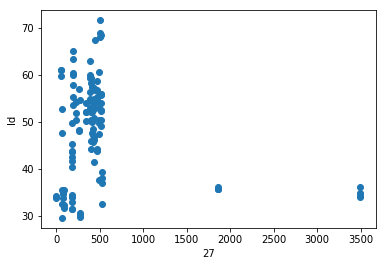

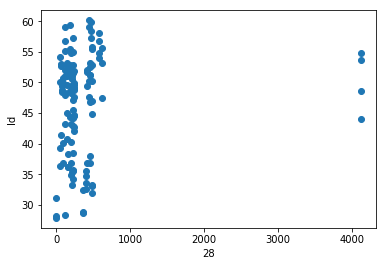

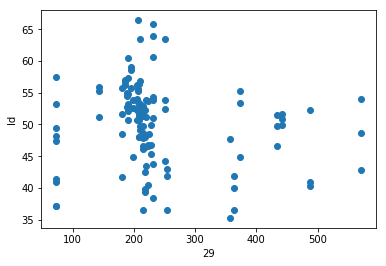

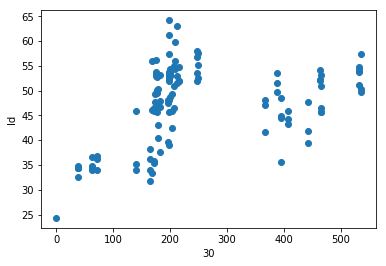

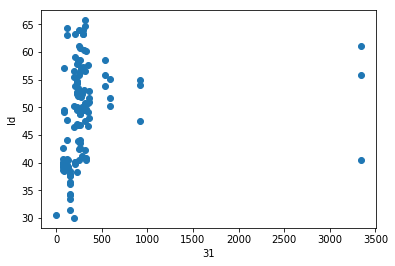

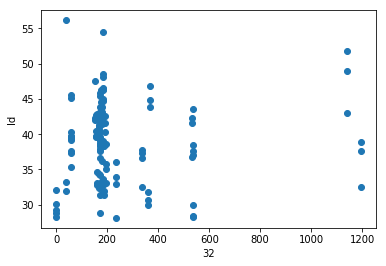

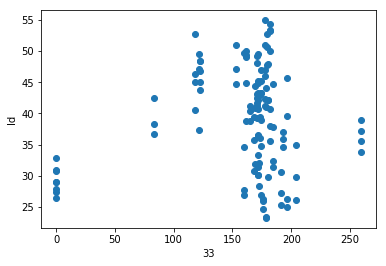

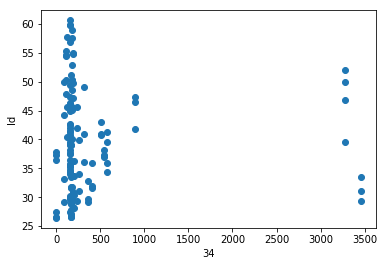

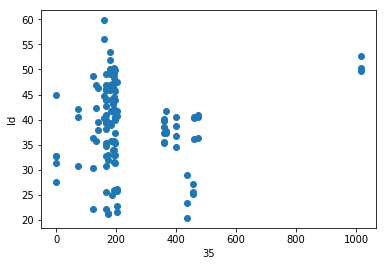

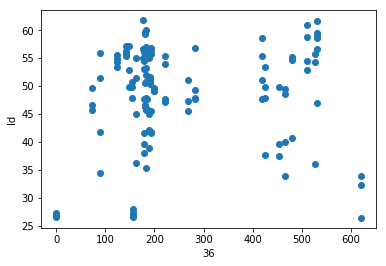

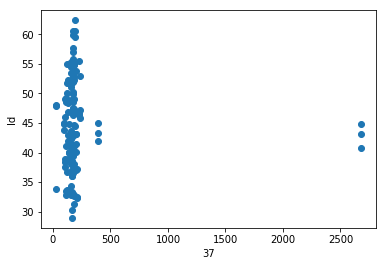

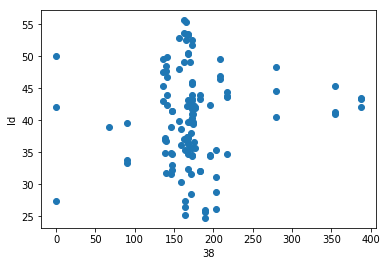

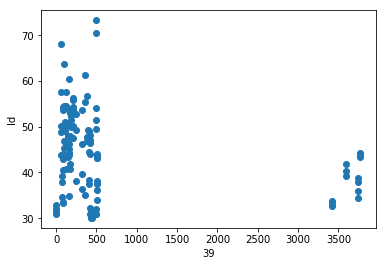

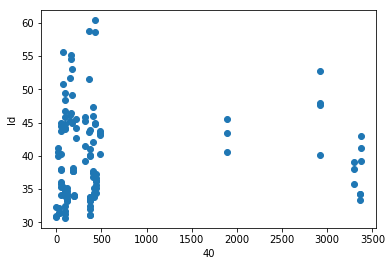

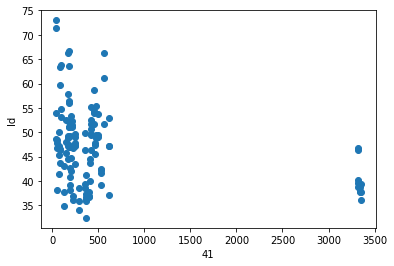

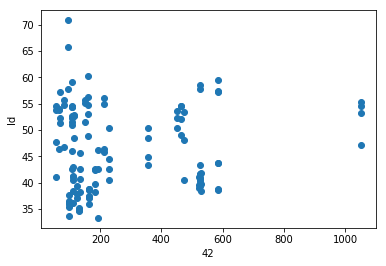

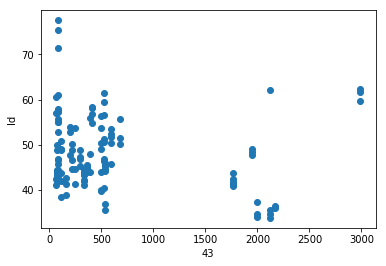

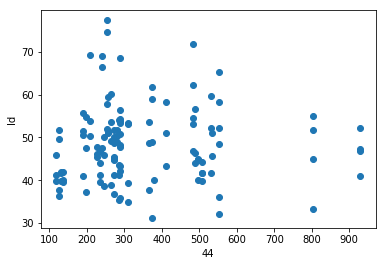

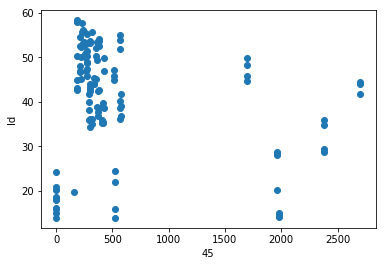

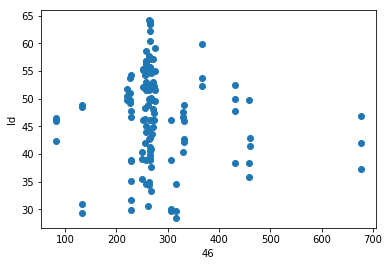

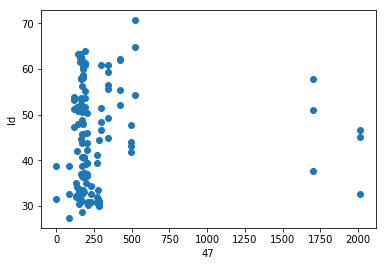

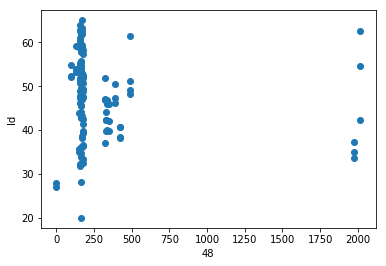

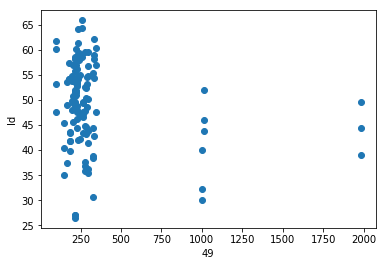

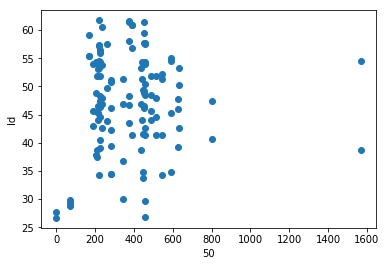

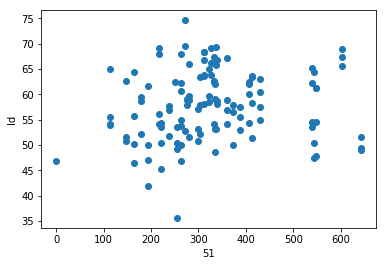

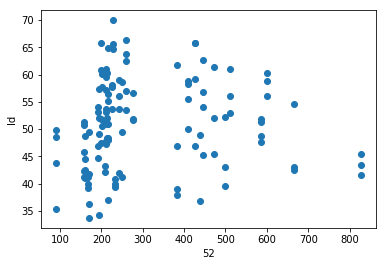

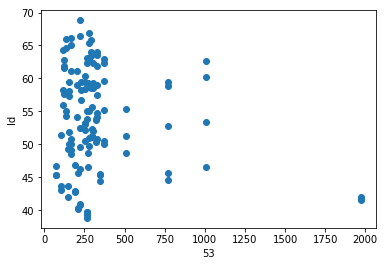

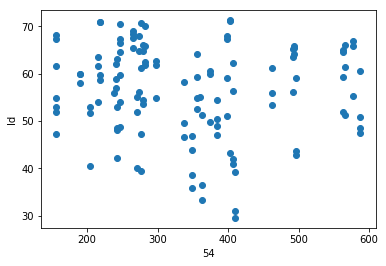

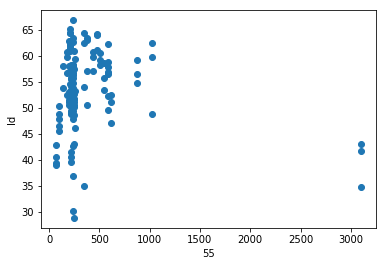

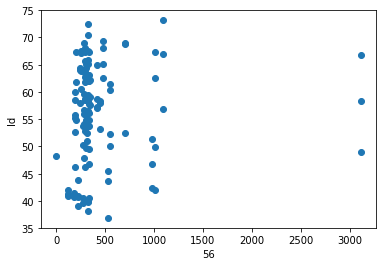

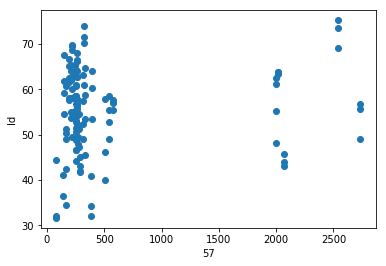

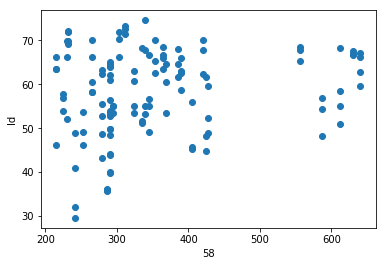

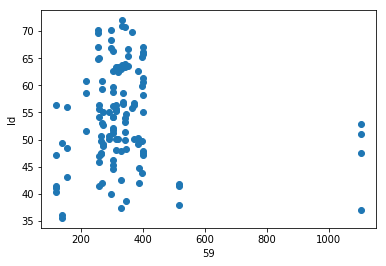

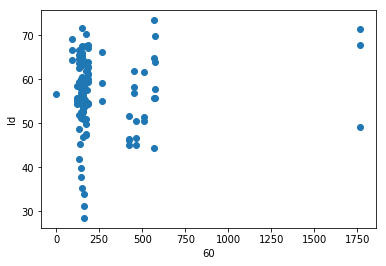

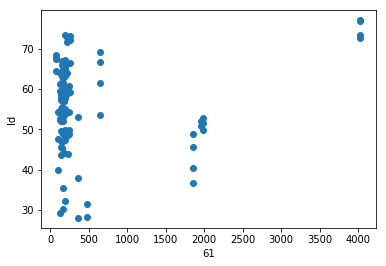

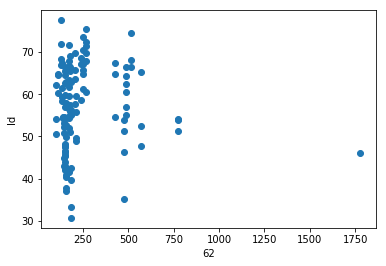

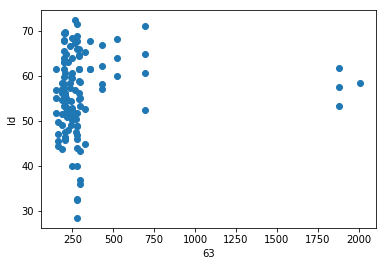

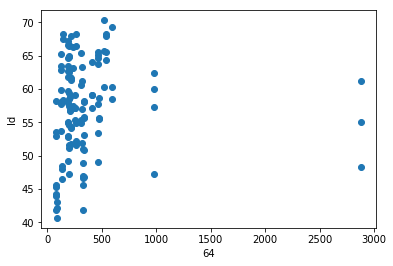

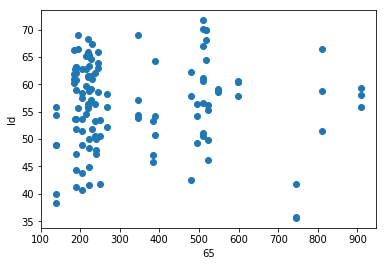

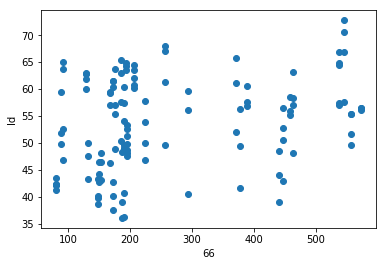

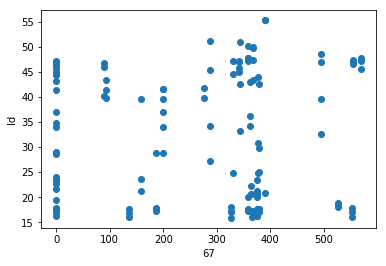

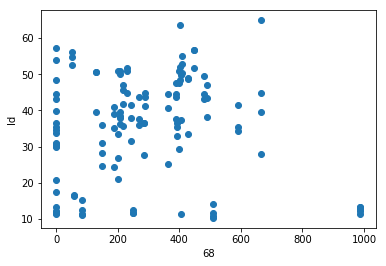

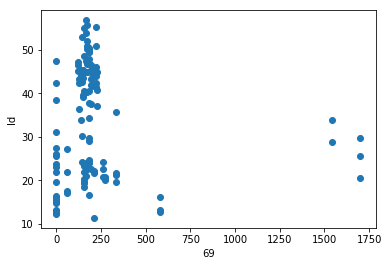

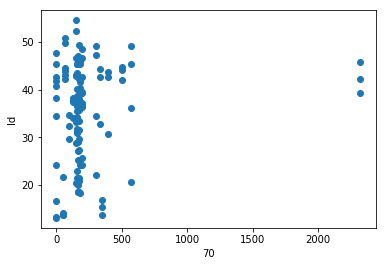

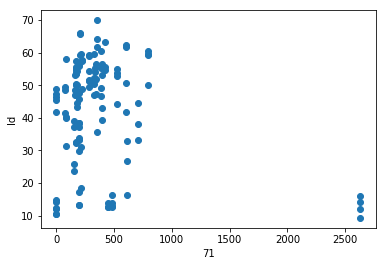

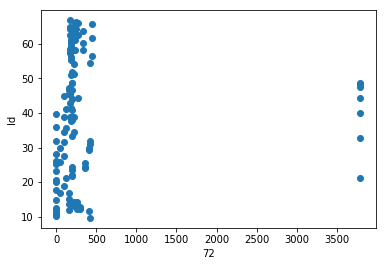

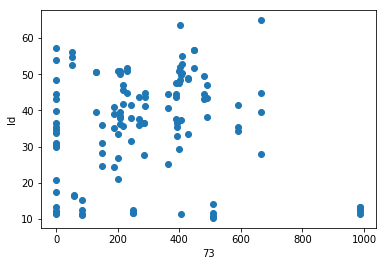

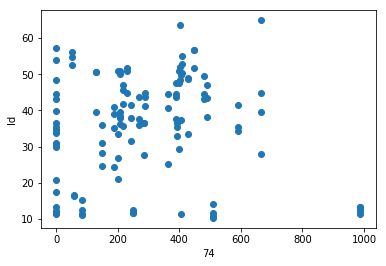

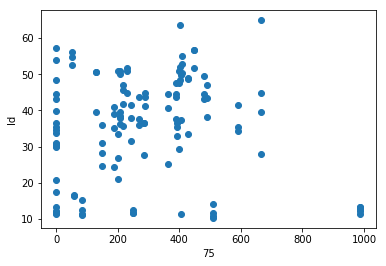

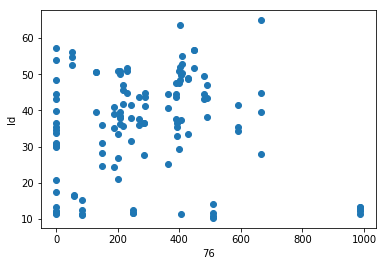

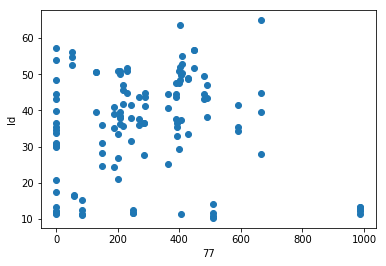

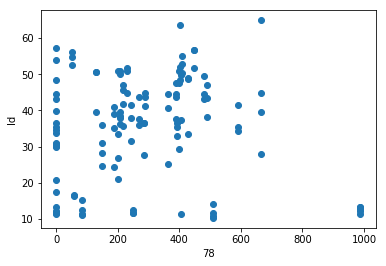

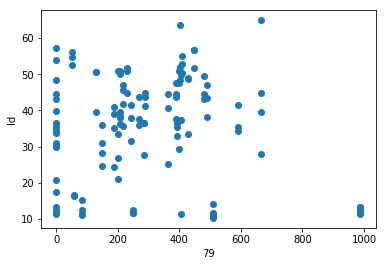

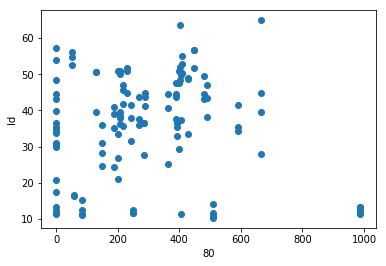

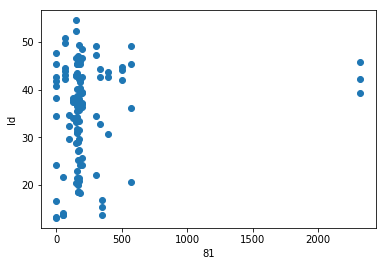

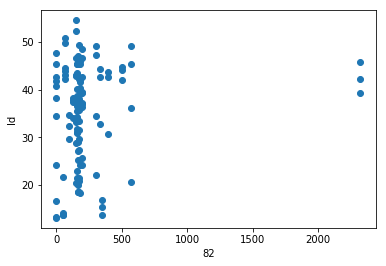

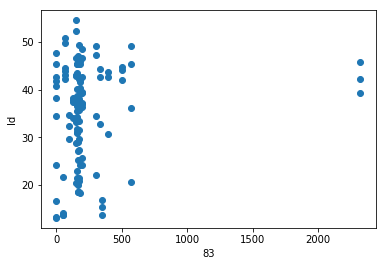

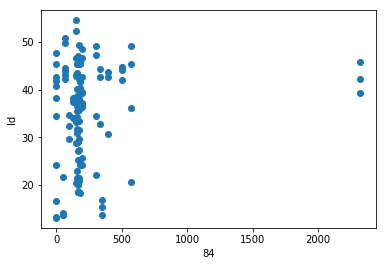

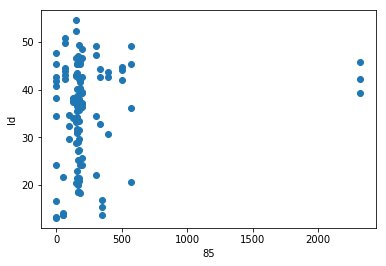

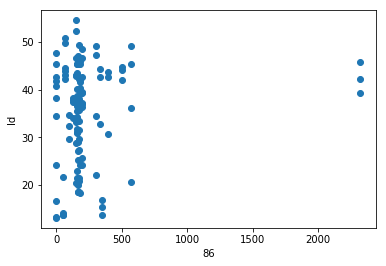

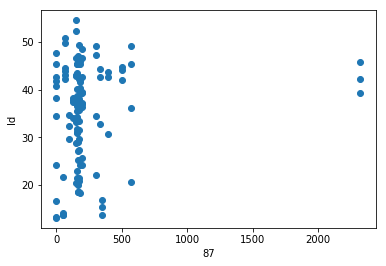

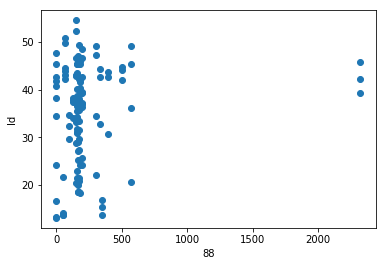

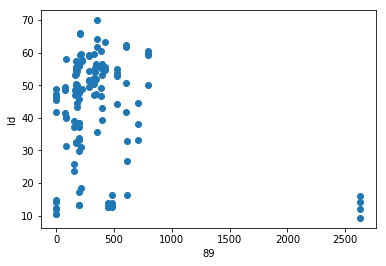

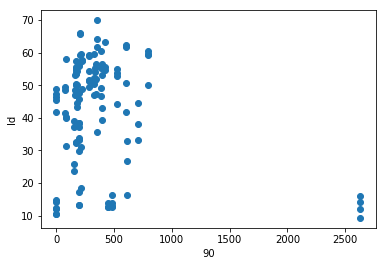

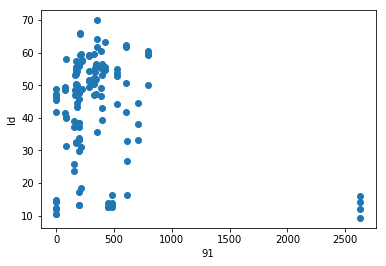

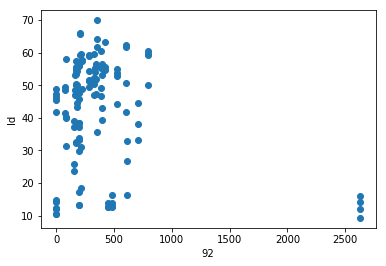

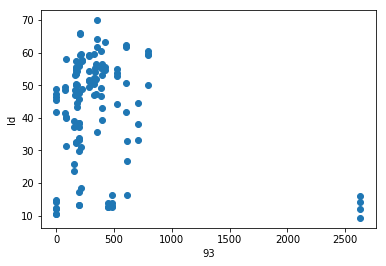

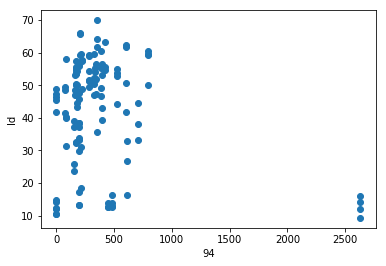

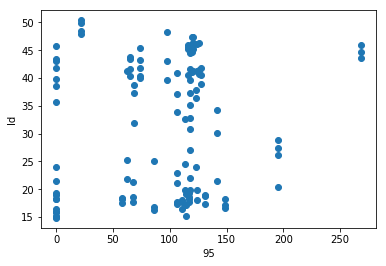

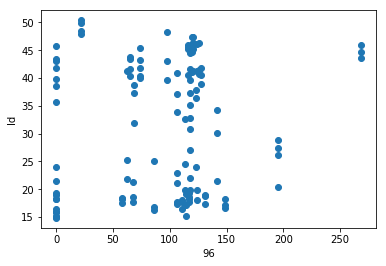

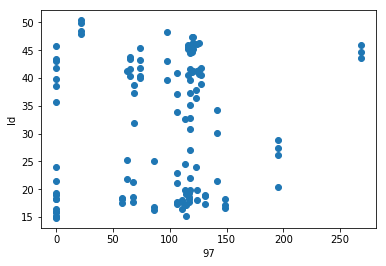

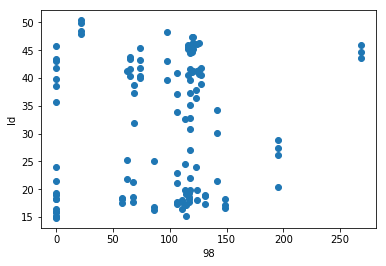

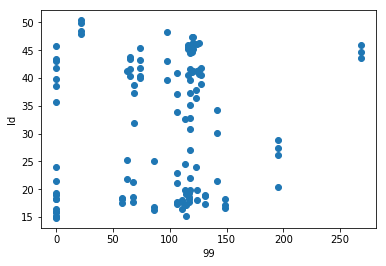

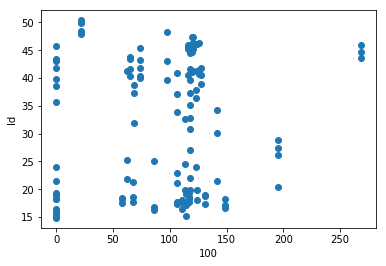

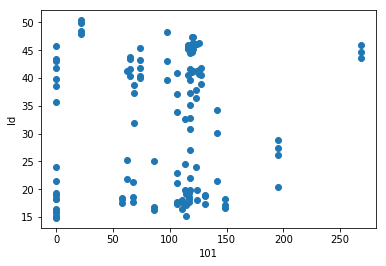

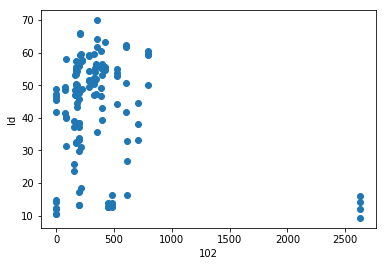

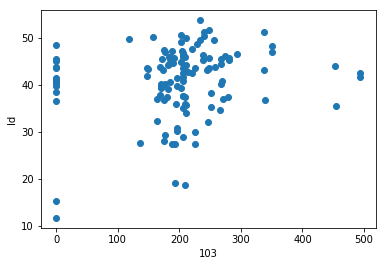

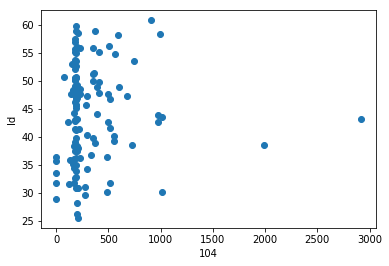

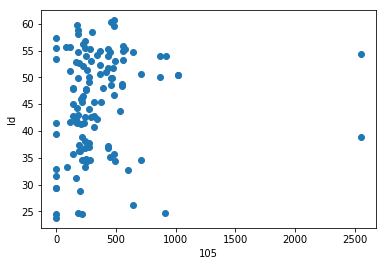

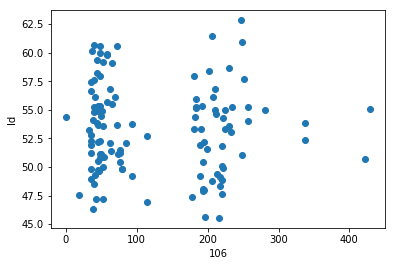

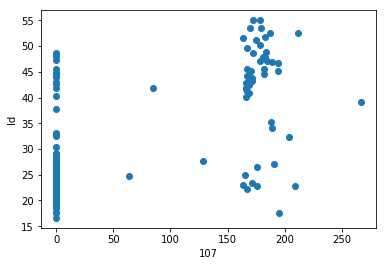

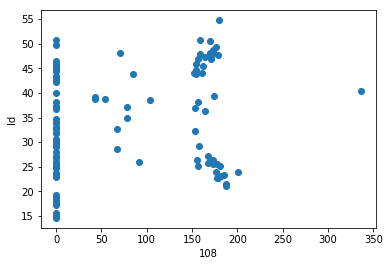

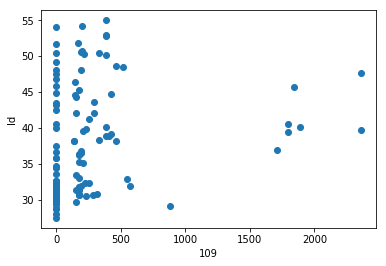

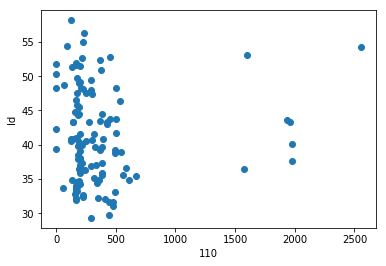

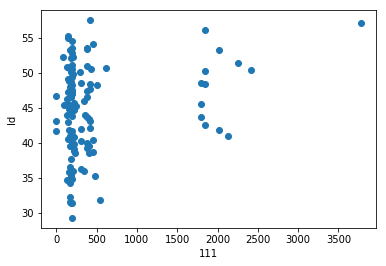

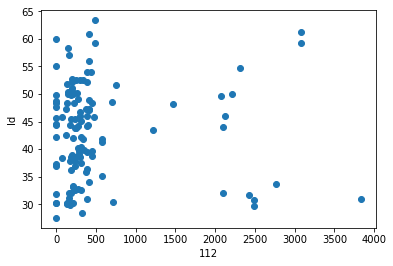

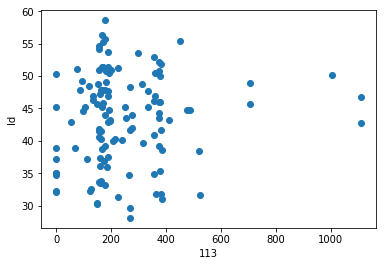

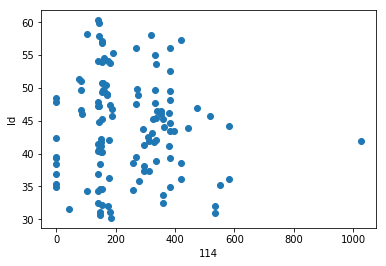

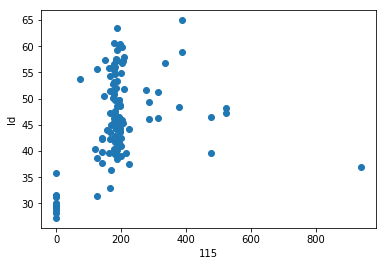

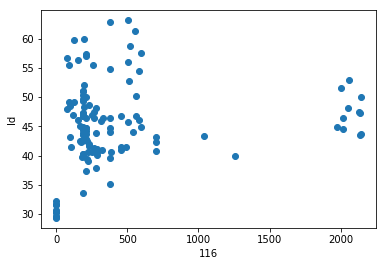

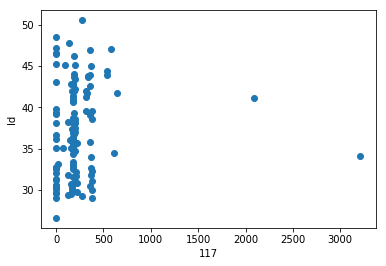

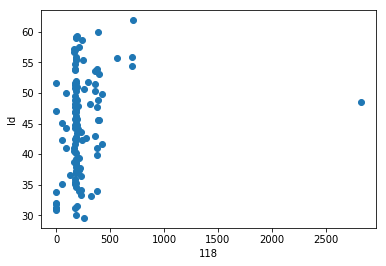

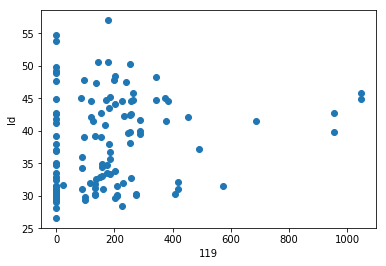

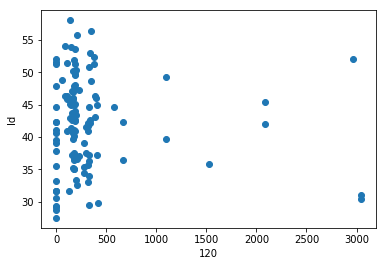

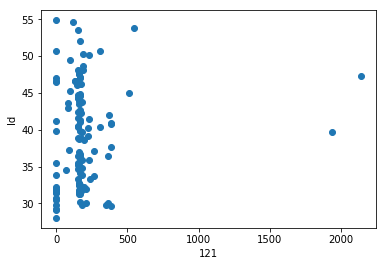

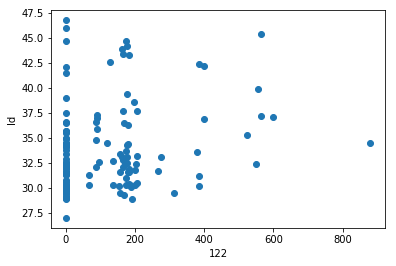

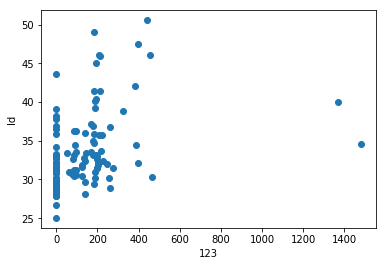

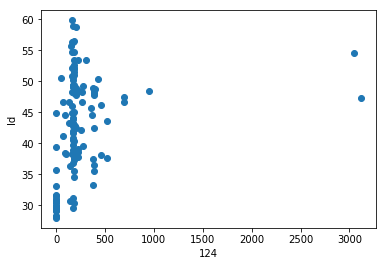

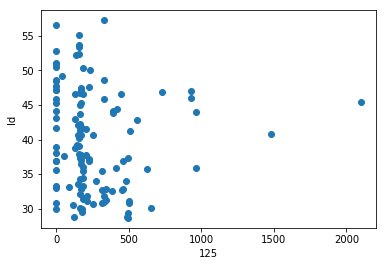

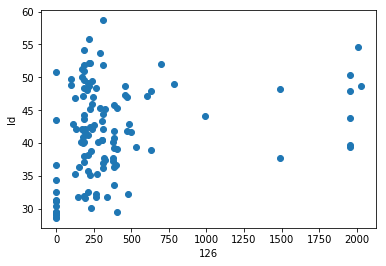

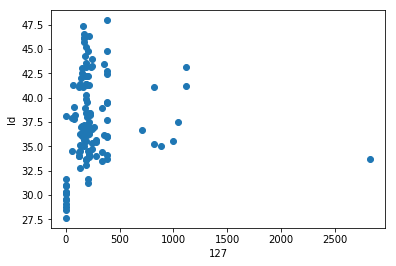

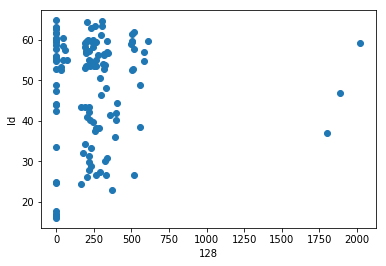

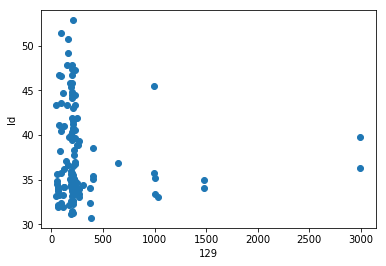

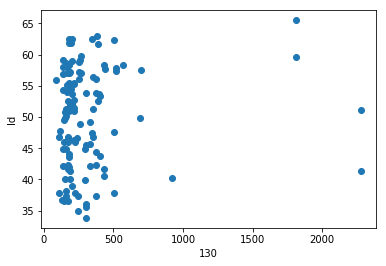

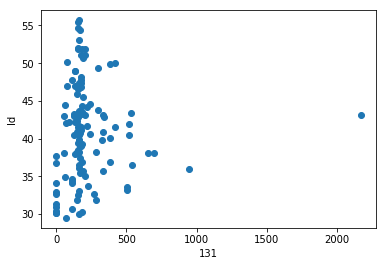

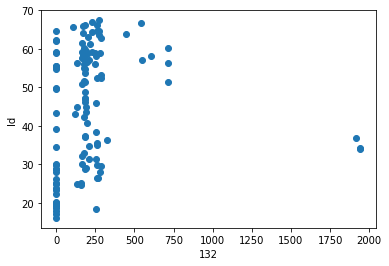

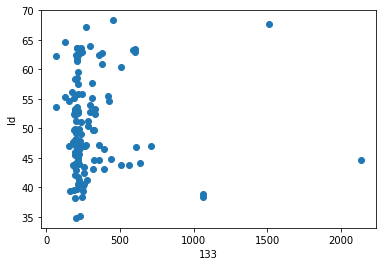

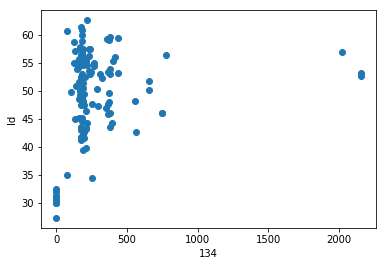

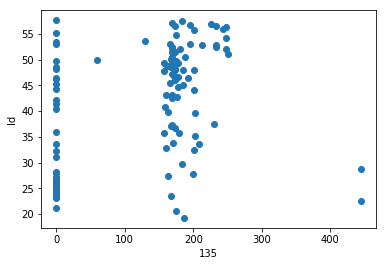

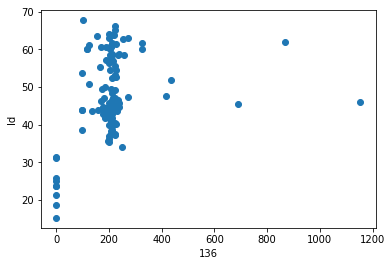

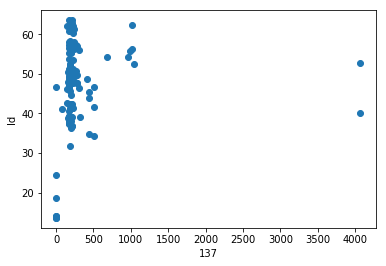

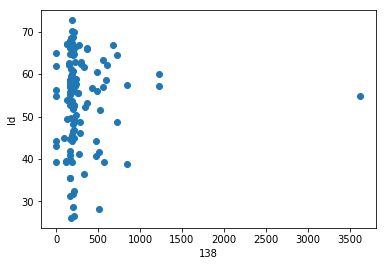

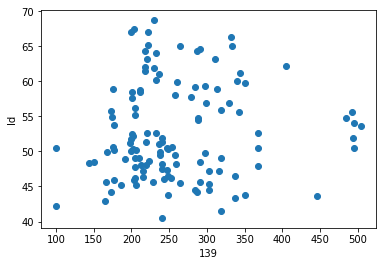

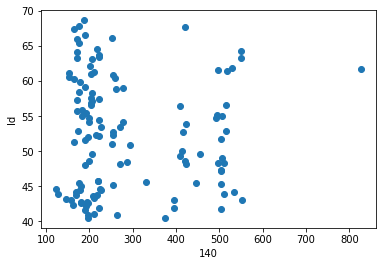

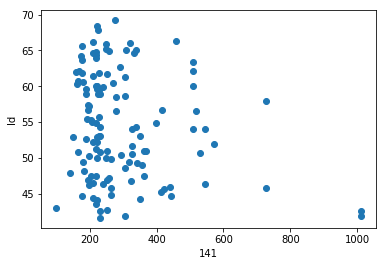

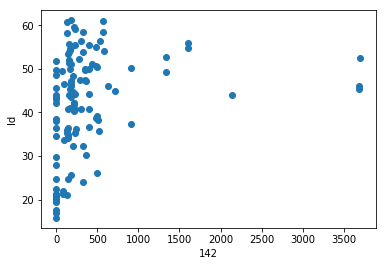

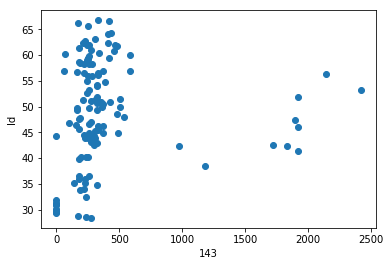

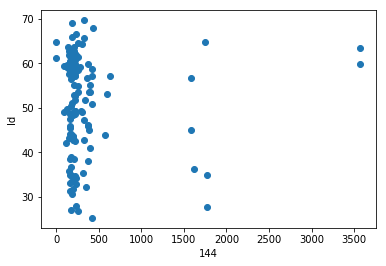

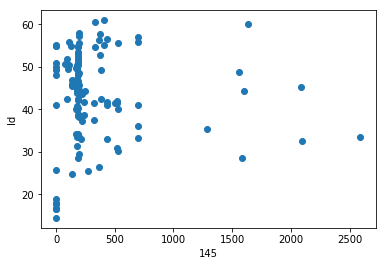

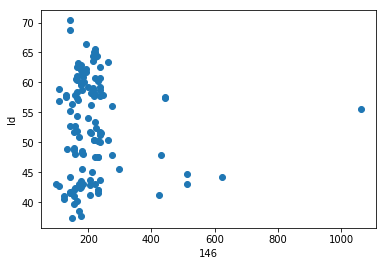

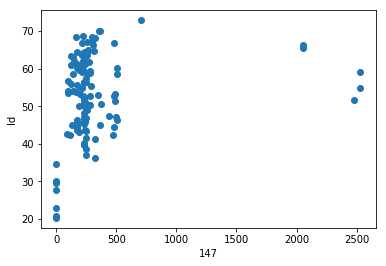

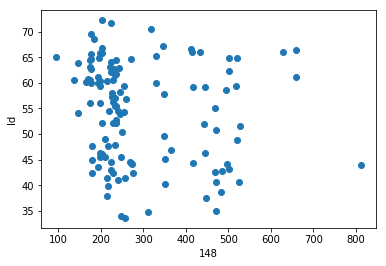

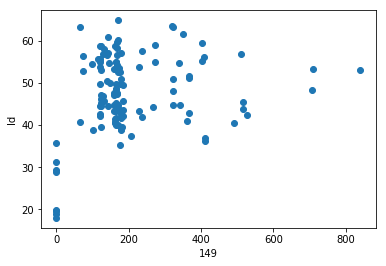

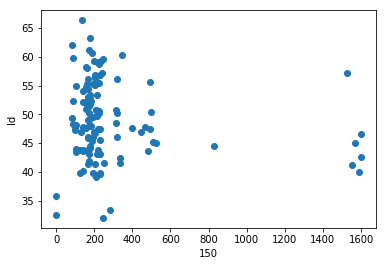

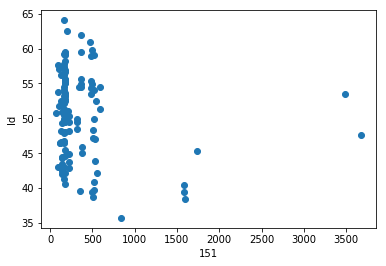

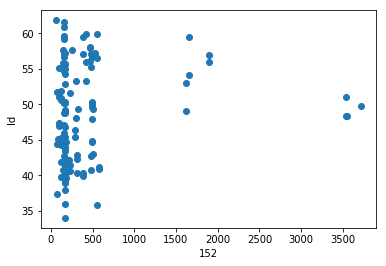

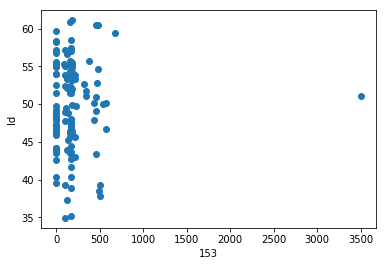

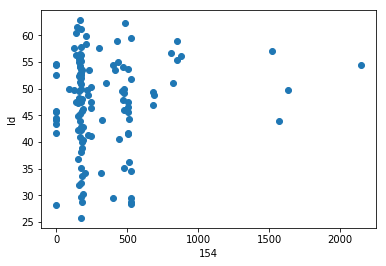

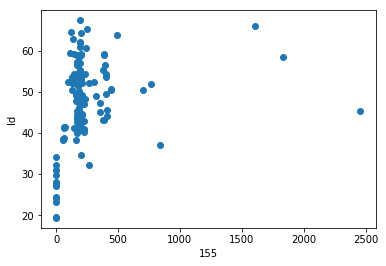

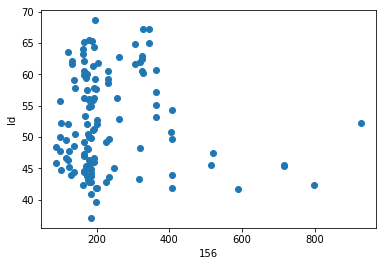

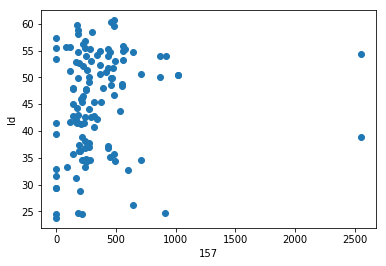

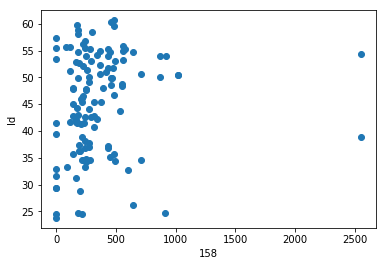

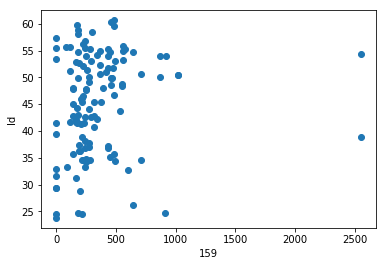

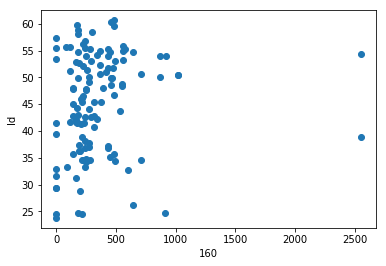

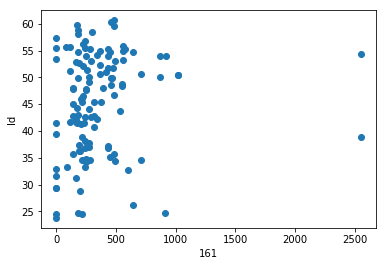

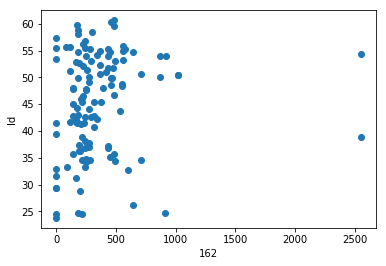

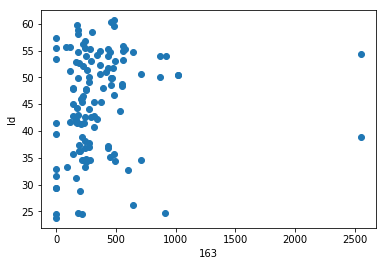

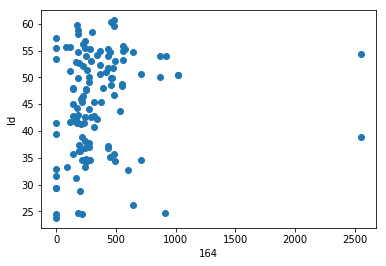

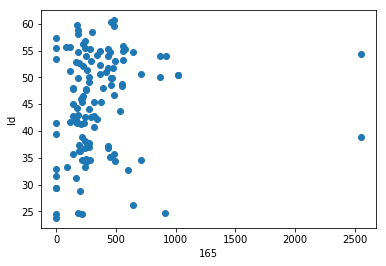

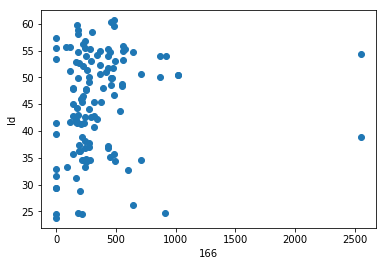

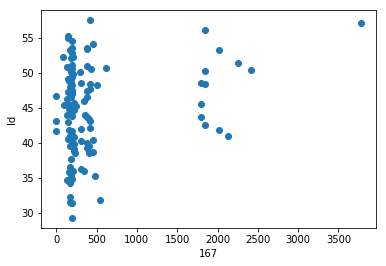

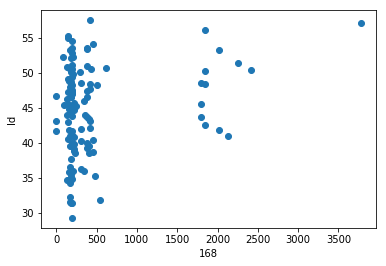

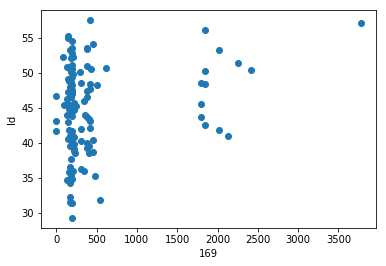

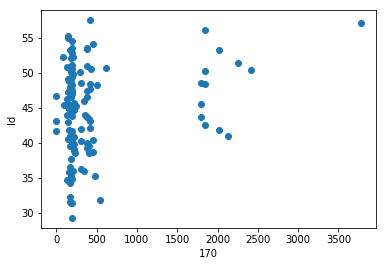

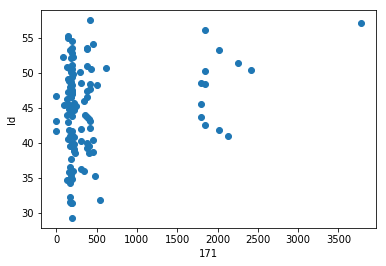

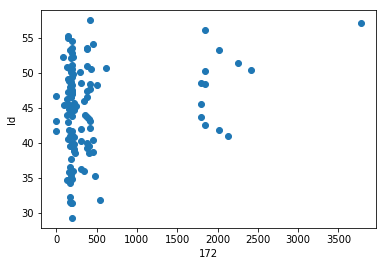

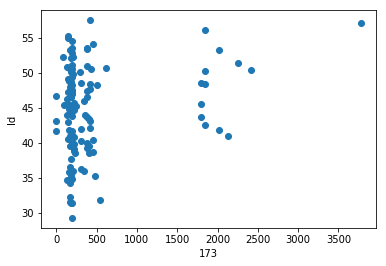

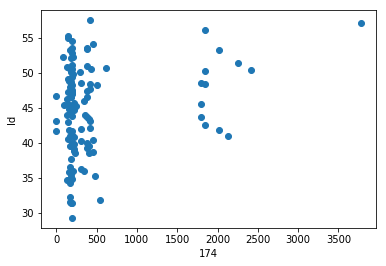

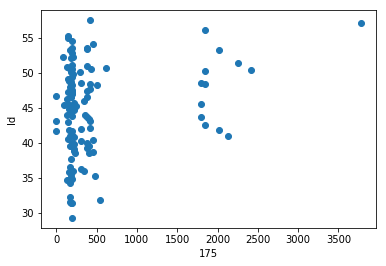

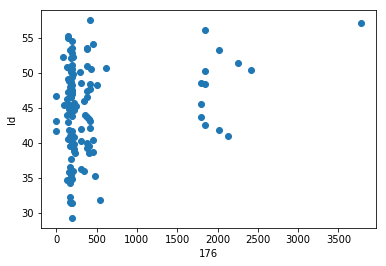

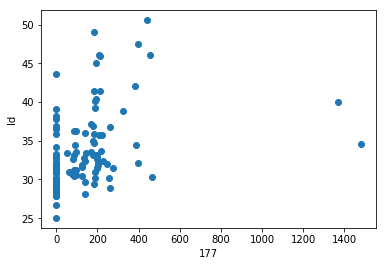

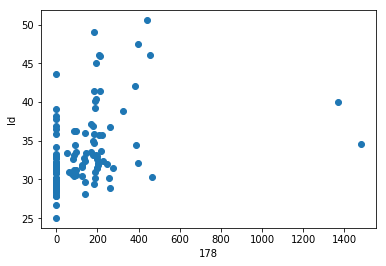

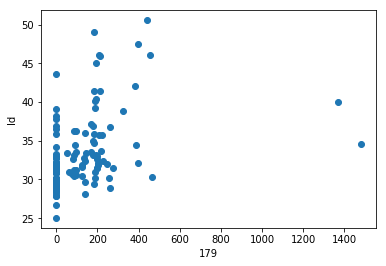

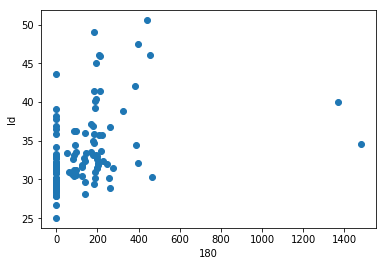

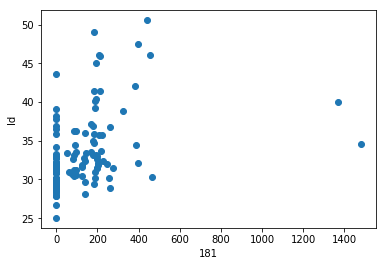

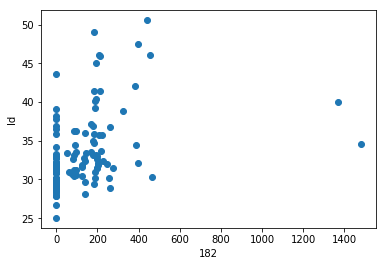

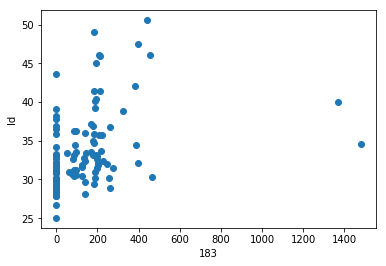

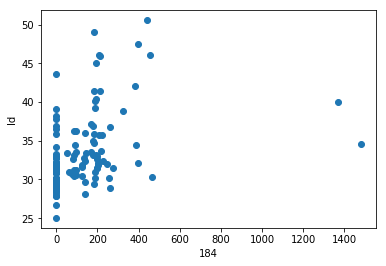

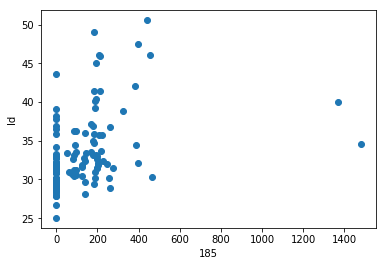

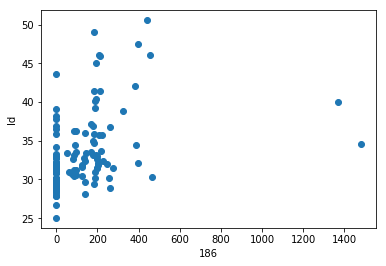

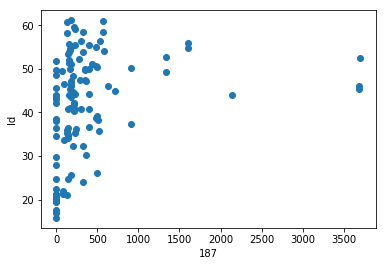

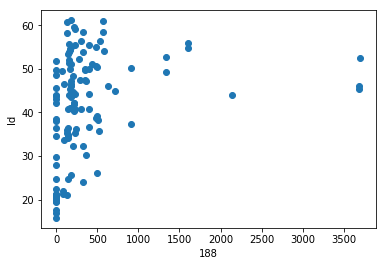

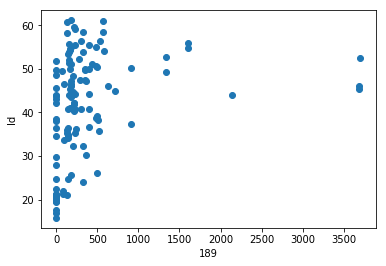

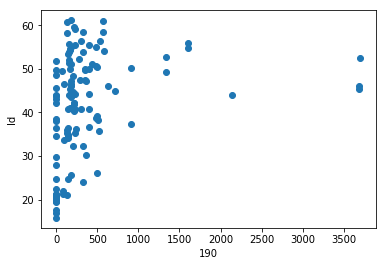

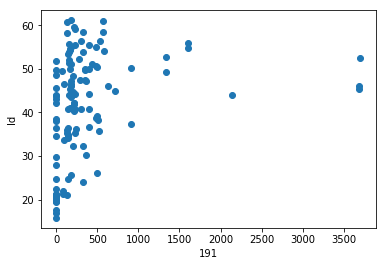

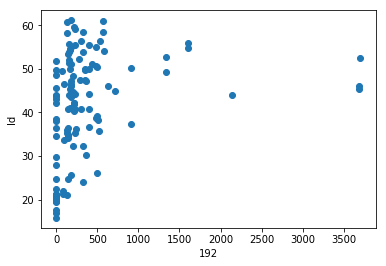

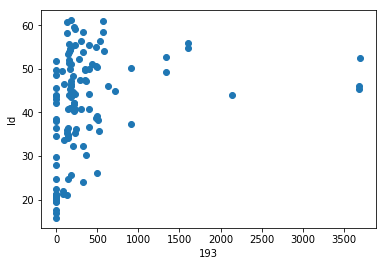

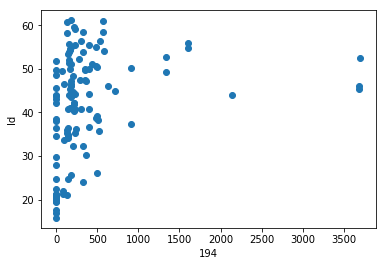

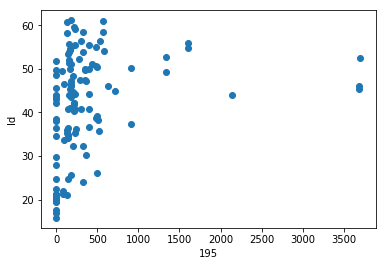

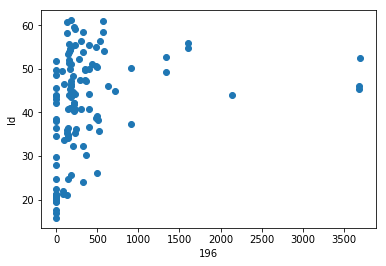

In [63]:
for i in range(len(female)):
    plt.scatter(x=female["Hz"][i], y = female["Db"][i])
    plt.ylabel('Id')
    plt.xlabel(i)
    plt.show()

In [64]:
for i in range(len(male)):
    for k in range(0,mini):
        if (male["Hz"][i][k] > 260):
            male['Hz'][i][k] = 260 
        else:
            continue
# data.loc[data['LotFrontage']>250, ['LotFrontage']]

for i in range(len(female)):
    for k in range(0,mini):
        if (female["Hz"][i][k] > 525):
            female['Hz'][i][k] = 525
        else:
            continue

# Modelling

In [65]:
#Creating our X matrix
cols=['Db','Hz']#selecting only hz and db data
mat=[] #empty matrix
for c in cols:
    for k in range(mini):
        l=[] #empty array
        for i in range(len(result)):
            l.append(result[c][i][k]) #filling the array making it the column we are going to use
        mat.append(l) #append our column to the matrix
X=pd.DataFrame(mat) #make it a pandas df
X=X.T #transpose it
X=pd.concat([X,result.Person],axis=1)#add person column

first 123 columns are the decibel records, while other 123 are the pitch record. we just want to add columns with summary of them in order to keep the relationship between values

In [66]:
#Adding mean, max, min and SD columns, for DB and for HZ
X['dbMean']=X.iloc[:,0:mini].mean(axis=1)
X['dbMax']=X.iloc[:,0:mini].max(axis=1)
X['dbMin']=X.iloc[:,0:mini].min(axis=1)
X['dbSd']=X.iloc[:,0:mini].std(axis=1)

X['hzMean']=X.iloc[:,mini:mini*2].mean(axis=1)
X['hzMax']=X.iloc[:,mini:mini*2].max(axis=1)
X['hzMin']=X.iloc[:,mini:mini*2].min(axis=1)
X['hzSd']=X.iloc[:,mini:mini*2].std(axis=1)

In [67]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,245,Person,dbMean,dbMax,dbMin,dbSd,hzMean,hzMax,hzMin,hzSd
0,51.509708,49.206464,53.098951,52.469692,53.167057,52.176484,48.654212,53.256975,52.688264,56.267311,...,78.327759,3,45.657025,60.430434,28.226776,10.198261,145.237673,260.0,0.000000,81.641767
1,55.108600,51.864689,51.652674,47.638640,49.127333,48.002193,53.917669,54.711934,54.078948,51.856219,...,332.609030,3,54.988873,67.219331,44.254314,5.501162,230.270785,525.0,34.603928,129.447513
2,29.527381,27.660101,25.288264,20.859257,22.952716,26.111523,39.505439,35.678947,34.919236,32.231507,...,64.099609,3,34.554521,57.734981,20.859257,6.980656,138.710652,260.0,0.000000,79.049734
3,33.119447,28.733595,33.640379,45.195911,46.322613,38.580593,42.709851,39.776593,30.642523,24.077781,...,168.398966,3,39.661745,62.649082,24.077781,7.639918,175.740902,260.0,75.366211,55.562299
4,19.453184,18.038502,16.372480,15.836151,23.020714,23.356387,21.816119,22.132527,21.352715,19.915726,...,497.380534,3,30.749519,54.035856,14.676970,10.982163,296.812608,525.0,0.000000,186.714036


In [68]:
#setting our y 
y=result.Male

#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## NAIVE BAYES

In [69]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
model_gnb.score(X_test, y_test)
GNB_predictions = model_gnb.predict(X_test)

false_positive_rate_GNB, true_positive_rate_GNB, thresholds_GNB = roc_curve(y_test, GNB_predictions)
roc_auc_GNB = auc(false_positive_rate_GNB, true_positive_rate_GNB)
roc_auc_GNB

0.9620697463768115

# Random forest
## on Gender

In [70]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(X_train, y_train)  
RF_predictions = RF.predict(X_test)

In [71]:
RF.score(X_test,y_test)

0.924812030075188

In [72]:
false_positive_rate_RF, true_positive_rate_RF, thresholds_RF = roc_curve(y_test, RF_predictions)
roc_auc_RF = auc(false_positive_rate_RF, true_positive_rate_RF)
roc_auc_RF

0.921875

# Support vector machine 
## on Gender

In [73]:
SVM = svm.LinearSVC()  
SVM.fit(X_train, y_train)  
SVM_predictions = SVM.predict(X_test) 

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
SVM.score(X_test,y_test)

0.8037383177570093

In [74]:
false_positive_rate_svm, true_positive_rate_svm, thresholds_svm = roc_curve(y_test, SVM_predictions)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)
roc_auc_svm


0.8705842391304348

# Logistic regression
## on Gender

In [75]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)  
LR_predictions = LR.predict(X_test)  

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [76]:
LR.score(X_test,y_test)

0.8721804511278195

In [77]:
false_positive_rate_LR, true_positive_rate_LR, thresholds_LR = roc_curve(y_test, LR_predictions)
roc_auc_LR = auc(false_positive_rate_LR, true_positive_rate_LR)
roc_auc_LR


0.8722826086956521

# KNN for gender



In [78]:
print("[INFO] tuning hyperparameters via grid search")
# construct the set of hyperparameters to tune
params = {"n_neighbors": np.arange(1, 31, 2),
	"metric": ["euclidean", "cityblock"]}
model = KNeighborsClassifier()
grid = GridSearchCV(model, params)
grid.fit(X_train, y_train)
grid.best_params_

[INFO] tuning hyperparameters via grid search


C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'metric': 'cityblock', 'n_neighbors': 1}

In [79]:
model_KNN = KNeighborsClassifier(n_neighbors = 1, metric = 'cityblock')
model_KNN.fit(X_train, y_train)
KNN_predictions = model_KNN.predict(X_test)
model_KNN.score(X_test,y_test)

0.8571428571428571

In [80]:
false_positive_rate_KNN, true_positive_rate_KNN, thresholds_KNN = roc_curve(y_test, KNN_predictions)
roc_auc_KNN= auc(false_positive_rate_KNN, true_positive_rate_KNN)
roc_auc_KNN

0.8526947463768115

# Neural Network
## on Gender

In [81]:
NN = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train, y_train)  
NN_predictions = NN.predict(X_test)

In [82]:
NN.score(X_test, y_test)

0.48872180451127817

In [83]:
false_positive_rate_NN, true_positive_rate_NN, thresholds_NN = roc_curve(y_test, NN_predictions)
roc_auc_NN = auc(false_positive_rate_NN, true_positive_rate_NN)
roc_auc_NN

0.47214673913043476

## PLOT AUC


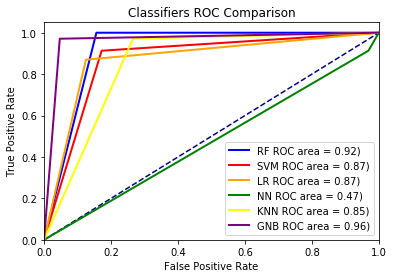

In [84]:
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Classifiers ROC Comparison')
plt.plot(false_positive_rate_RF, true_positive_rate_RF, color='blue', lw=2, label='RF ROC area = %0.2f)' % roc_auc_RF)
plt.plot(false_positive_rate_svm, true_positive_rate_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(false_positive_rate_LR, true_positive_rate_LR, color='orange', lw=2, label='LR ROC area = %0.2f)' % roc_auc_LR)
plt.plot(false_positive_rate_NN, true_positive_rate_NN, color='green', lw=2, label='NN ROC area = %0.2f)' % roc_auc_NN)
plt.plot(false_positive_rate_KNN, true_positive_rate_KNN, color='yellow', lw=2, label='KNN ROC area = %0.2f)' % roc_auc_KNN)
plt.plot(false_positive_rate_GNB, true_positive_rate_GNB, color='purple', lw=2, label='GNB ROC area = %0.2f)' % roc_auc_GNB)
plt.legend(loc="lower right")
plt.show()

# MODELS ON FEELING

In [85]:
y=result.Feeling 


#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Support vector machine 
## on Feeling

In [86]:
SVM = svm.SVC(decision_function_shape="ovo")  
SVM.fit(X_train, y_train)  
SVM.predict(X_test) 

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 3, 2,
       1, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3,
       3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3,
       2, 3, 3, 0, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 1, 3, 1, 2, 2, 3, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 1, 0, 3, 3, 3, 3, 2, 3, 1,
       1])

In [87]:
SVM.score(X_test,y_test)

0.556390977443609

## KNN on feeling


Autotuning with GridSearchCV

In [115]:
print("[INFO] tuning hyperparameters via grid search")
# construct the set of hyperparameters to tune
params = {"n_neighbors": np.arange(1, 31, 2),
	"metric": ["euclidean", "cityblock"]}
model = KNeighborsClassifier()
grid = GridSearchCV(model, params)
grid.fit(X_train, y_train)
grid.best_params_


[INFO] tuning hyperparameters via grid search


C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'metric': 'cityblock', 'n_neighbors': 1}

Running the model 

In [88]:
model_KNN = KNeighborsClassifier(n_neighbors = 1, metric = 'cityblock')
model_KNN.fit(X_train, y_train)
model_KNN.score(X_test,y_test)

0.6240601503759399

In [129]:
import matplotlib
matplotlib.use('GTKAgg')
from matplotlib.colors import ListedColormap

C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\yammo-pc\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\yammo-pc\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\yammo-pc\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File

In [141]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = .02
x_min, x_max = X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5
y_min, y_max = X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

Z = model_KNN.predict([xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

ValueError: query data dimension must match training data dimension

## NAIVE BAYES 


In [89]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
model_gnb.score(X_test, y_test)

0.518796992481203

# Logistic regression
## on Feeling

In [90]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)  
LR.predict(X_test)

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([3, 0, 3, 1, 1, 2, 2, 0, 2, 3, 3, 0, 1, 0, 1, 3, 0, 0, 1, 1, 0, 2,
       1, 3, 3, 1, 0, 2, 0, 2, 2, 1, 3, 1, 3, 1, 2, 2, 3, 0, 1, 2, 2, 2,
       1, 0, 1, 3, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 0, 1, 1, 3,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 3, 2, 1, 3, 2, 0, 2, 1, 2, 3, 2, 1, 3,
       3, 3, 0, 1, 2, 1, 2, 2, 0, 0, 3, 1, 3, 1, 0, 0, 1, 1, 2, 0, 0, 3,
       0, 2, 2, 2, 1, 3, 0, 2, 1, 1, 3, 0, 2, 1, 0, 2, 1, 3, 1, 2, 2, 1,
       1])

In [91]:
LR.score(X_test,y_test)

0.6015037593984962

# Random forest
## on Feeling

In [92]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(X_train, y_train)  
RF.predict(X_test)

array([3, 1, 0, 0, 1, 0, 2, 0, 2, 2, 3, 3, 1, 0, 1, 3, 0, 0, 2, 3, 1, 2,
       1, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 3, 3, 1, 0, 3, 1, 1, 1, 1, 2, 2,
       0, 0, 2, 3, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 3, 1, 0, 1, 2, 1, 2, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 3, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 3,
       3, 3, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2,
       0, 1, 2, 3, 2, 0, 0, 3, 0, 3, 3, 0, 2, 1, 0, 1, 2, 2, 2, 2, 3, 1,
       1])

In [93]:
RF.score(X_test,y_test)

0.5488721804511278

# Neural Network
## on Feeling

In [94]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train, y_train)  
NN.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [95]:
NN.score(X_test, y_test)

0.24812030075187969

# Clustering

In [97]:
##set the kmean model
kmeans = KMeans(init='k-means++', n_init=10, n_clusters=2, random_state=0).fit(list(result["Db"]))

In [98]:
##predict the gender from Db for each line in the matrix
count=0 #to count how many times it's right
for i in range(len(result)):
    pred=kmeans.predict(list([result["Hz"][i]])) #say in which cluster is the datapoint db, i
    true=result["Male"][i] #the true Male value of line i 
    
#     print(str(pred)+" "+str(true))
    if pred==true: #if he get the real value
        count+=1
# print(str(count)+"/"+str(len(result)))     #print how many times it predict  
print(count/len(result))

0.511166253101737
